##### Мансуров Константин
### Задание:
1. скачать Access Log серверов NASA за июль 1995 года отсюда;  
2. распарсить файл в Pandas DataFrame;  
3. посчитать количество обращений к каждому урлу;  
4. найти топ-15 самых посещаемых урлов;  
5. посчитать число запросов в секунду;  
6. нарисовать график числа запросов в секунду;  
7. построить гистограмму распределения размеров запросов.  
8. В качестве ответа приложите файл с кодом или Jupyter Notebook.

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#"latin-1"
#"ISO-8859-1"
#'cp1251'

# host making the request. A hostname when possible, otherwise the Internet address if the name could not be looked up.
# timestamp in the format "DAY MON DD HH:MM:SS YYYY", where DAY is the day of the week, MON is the name of the month, DD is the day of the month, HH:MM:SS is the time of day using a 24-hour clock, and YYYY is the year. The timezone is -0400.
# request given in quotes.
# HTTP reply code.
# bytes in the reply.
names = ["host","timestamp","request","HTTP","bytes"]

In [3]:
path = "NASA_access_log_Jul95"
df = pd.read_csv(path, sep=" ", encoding='cp1251', error_bad_lines=False, header=None, names = [i for i in range(12)], dtype=str)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245,NaN,NaN,NaN,NaN
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985,NaN,NaN,NaN,NaN
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,NaN,NaN,NaN,NaN
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,NaN,NaN,NaN,NaN
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
1891710,163.205.53.14,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/KSC-logosmall.gif HTTP/1.0,200,1204,NaN,NaN,NaN,NaN
1891711,tiger2.ocs.lsu.edu,-,-,[28/Jul/1995:13:32:23,-0400],GET /shuttle/missions/missions.html HTTP/1.0,200,8677,NaN,NaN,NaN,NaN
1891712,199.0.2.27,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/ksclogo-medium.gif HTTP/1.0,200,5866,NaN,NaN,NaN,NaN
1891713,tornado.umd.edu,-,-,[28/Jul/1995:13:32:25,-0400],GET /shuttle/missions/sts-74/sts-74-patch-smal...,200,5494,NaN,NaN,NaN,NaN
1891714,alyssa.p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выбросим последнюю строку так как она не несет никакой ценной информации

In [5]:
df = df.drop([df.shape[0]-1])
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
1891709,163.205.53.14,-,-,[28/Jul/1995:13:32:22,-0400],GET /shuttle/technology/images/srb_mod_compare...,200,28219,NaN,NaN,NaN,NaN
1891710,163.205.53.14,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/KSC-logosmall.gif HTTP/1.0,200,1204,NaN,NaN,NaN,NaN
1891711,tiger2.ocs.lsu.edu,-,-,[28/Jul/1995:13:32:23,-0400],GET /shuttle/missions/missions.html HTTP/1.0,200,8677,NaN,NaN,NaN,NaN
1891712,199.0.2.27,-,-,[28/Jul/1995:13:32:23,-0400],GET /images/ksclogo-medium.gif HTTP/1.0,200,5866,NaN,NaN,NaN,NaN
1891713,tornado.umd.edu,-,-,[28/Jul/1995:13:32:25,-0400],GET /shuttle/missions/sts-74/sts-74-patch-smal...,200,5494,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)
print(df.isna().sum())

(1891714, 12)
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8     1891700
9     1891713
10    1891713
11    1891714
dtype: int64


Можно заметить, что в столбце №8 содержится 14 значений отличающихся от NaN. В принципе этими данными можно пренебречь, но лучше все-таки посмотреть, что же есть в этих строках.

Уберем эти выбросы из датафрейма и сохраним их как отдельные на всякий случай

In [7]:
df[8].value_counts()

-            13
HTTP/1.0"     1
Name: 8, dtype: int64

In [8]:
exception1 = df[df[8]=="HTTP/1.0\""].index
df.loc[exception1]
# df1 = df.loc[exception1]
# df = df.drop(exception1)
# df1

,0,1,2,3,4,5,6,7,8,9,10,11
1545657,knuth.mtsu.edu,-,-,[22/Jul/1995:01:49:32,-0400],GET /images/>index,of,/images,"HTTP/1.0""",404,-,NaN


In [9]:
exception2 = df[df[8]=="-"].index
df.loc[exception2]
# df2 = df.loc[exception2]
# df = df.drop(exception2)
# df2

,0,1,2,3,4,5,6,7,8,9,10,11
131905,frank.mtsu.edu,-,-,[03/Jul/1995:02:41:15,-0400],GET /images/,"HTTP/1.0""",404,-,NaN,NaN,NaN
132117,frank.mtsu.edu,-,-,[03/Jul/1995:02:47:17,-0400],GET /images/,"HTTP/1.0""",404,-,NaN,NaN,NaN
132153,frank.mtsu.edu,-,-,[03/Jul/1995:02:48:51,-0400],GET /images/,"HTTP/1.0""",404,-,NaN,NaN,NaN
132223,frank.mtsu.edu,-,-,[03/Jul/1995:02:50:27,-0400],GET /images,"HTTP/1.0""",404,-,NaN,NaN,NaN
517922,141.102.80.253,-,-,[07/Jul/1995:11:57:49,-0400],GET /history/apollo/apollo.html,"HTTP/1.0""",404,-,NaN,NaN,NaN
840934,141.102.80.130,-,-,[12/Jul/1995:13:42:32,-0400],GET /history/apollo/apollo.html,"HTTP/1.0""",404,-,NaN,NaN,NaN
1008201,141.102.80.130,-,-,[13/Jul/1995:19:25:35,-0400],GET /history/apollo/apollo.html,"HTTP/1.0""",404,-,NaN,NaN,NaN
1051500,ris1_u27.rsoc.rockwell.com,-,-,[14/Jul/1995:10:37:53,-0400],GET /history/apollo/apollo.html,"HTTP/1.0""",404,-,NaN,NaN,NaN
1105477,piweba3y.prodigy.com,-,-,[14/Jul/1995:23:46:07,-0400],"GET /history/appollo/appollo-13/html-more%20info""","HTTP/1.0""",404,-,NaN,NaN,NaN
1295173,arc.dental.upenn.edu,-,-,[18/Jul/1995:11:53:44,-0400],"GET /elv/elvpage.htm/MISSION""","HTTP/1.0""",403,-,NaN,NaN,NaN


In [10]:
df.loc[exception1,5:11] = [(df.loc[exception1][5] + " " + df.loc[exception1][6] + " " 
                           + df.loc[exception1][7] + " " + df.loc[exception1][8]).values[0],
                           df.loc[exception1][9].values[0],0,np.nan,np.nan,np.nan,np.nan]
df.loc[exception1]

,0,1,2,3,4,5,6,7,8,9,10,11
1545657,knuth.mtsu.edu,-,-,[22/Jul/1995:01:49:32,-0400],"GET /images/>index of /images HTTP/1.0""",404,0,NaN,NaN,NaN,NaN


In [11]:
df.loc[exception2,5:11] = np.array(
    [(df.loc[exception2][5] + " " + df.loc[exception2][6]).values,df.loc[exception2][7].values,
    [0 for i in range(13)], [np.nan for i in range(13)], [np.nan for i in range(13)], [np.nan for i in range(13)], [np.nan for i in range(13)]]
                                  ).T
df.loc[exception2]

,0,1,2,3,4,5,6,7,8,9,10,11
131905,frank.mtsu.edu,-,-,[03/Jul/1995:02:41:15,-0400],"GET /images/ HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
132117,frank.mtsu.edu,-,-,[03/Jul/1995:02:47:17,-0400],"GET /images/ HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
132153,frank.mtsu.edu,-,-,[03/Jul/1995:02:48:51,-0400],"GET /images/ HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
132223,frank.mtsu.edu,-,-,[03/Jul/1995:02:50:27,-0400],"GET /images HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
517922,141.102.80.253,-,-,[07/Jul/1995:11:57:49,-0400],"GET /history/apollo/apollo.html HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
840934,141.102.80.130,-,-,[12/Jul/1995:13:42:32,-0400],"GET /history/apollo/apollo.html HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
1008201,141.102.80.130,-,-,[13/Jul/1995:19:25:35,-0400],"GET /history/apollo/apollo.html HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
1051500,ris1_u27.rsoc.rockwell.com,-,-,[14/Jul/1995:10:37:53,-0400],"GET /history/apollo/apollo.html HTTP/1.0""",404,0,NaN,NaN,NaN,NaN
1105477,piweba3y.prodigy.com,-,-,[14/Jul/1995:23:46:07,-0400],GET /history/appollo/appollo-13/html-more%20in...,404,0,NaN,NaN,NaN,NaN
1295173,arc.dental.upenn.edu,-,-,[18/Jul/1995:11:53:44,-0400],"GET /elv/elvpage.htm/MISSION"" HTTP/1.0""",403,0,NaN,NaN,NaN,NaN


In [12]:
print(df.shape)
print("1: ", df[1].value_counts())
print("2: ", df[2].value_counts())
print("4: ", df[4].value_counts())
print("8: ", df[8].value_counts())
print("9: ", df[9].value_counts())
print("10:", df[10].value_counts())
print("11:", df[11].value_counts())

(1891714, 12)
1:  -    1891714
Name: 1, dtype: int64
2:  -    1891714
Name: 2, dtype: int64
4:  -0400]    1891714
Name: 4, dtype: int64
8:  Series([], Name: 8, dtype: int64)
9:  Series([], Name: 9, dtype: int64)
10: Series([], Name: 10, dtype: int64)
11: Series([], Name: 11, dtype: int64)


Можно заметить что эти столбцы имеют одинаковые значения => избавимся от лишних и объединим некоторые

In [13]:
df[3] = df[3] + " " + df[4]
df = df.drop([1,2,4,8,9,10,11],axis=1)
df.head()

,0,3,5,6,7
0,199.72.81.55,[01/Jul/1995:00:00:01 -0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06 -0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,[01/Jul/1995:00:00:09 -0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,[01/Jul/1995:00:00:11 -0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,[01/Jul/1995:00:00:11 -0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


In [14]:
df.columns = names
df.head()

,host,timestamp,request,HTTP,bytes
0,199.72.81.55,[01/Jul/1995:00:00:01 -0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06 -0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,[01/Jul/1995:00:00:09 -0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,[01/Jul/1995:00:00:11 -0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,[01/Jul/1995:00:00:11 -0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


Проверим на наличие NaN'ов

In [15]:
df.isna().sum()

host         0
timestamp    0
request      0
HTTP         0
bytes        0
dtype: int64

Все в порядке. Теперь можно посчитать кол-во обращений к <b>host</b>

In [16]:
df["host"].value_counts()

piweba3y.prodigy.com           17572
piweba4y.prodigy.com           11591
piweba1y.prodigy.com            9868
alyssa.prodigy.com              7852
siltb10.orl.mmc.com             7573
piweba2y.prodigy.com            5922
edams.ksc.nasa.gov              5434
163.206.89.4                    4906
news.ti.com                     4863
disarray.demon.co.uk            4353
www-a2.proxy.aol.com            4179
www-d1.proxy.aol.com            4158
vagrant.vf.mmc.com              4146
198.133.29.18                   4136
poppy.hensa.ac.uk               4117
www-d4.proxy.aol.com            3977
webgate1.mot.com                3843
www-b3.proxy.aol.com            3755
e659229.boeing.com              3737
www-b2.proxy.aol.com            3732
www-b4.proxy.aol.com            3679
www-b5.proxy.aol.com            3669
www-a1.proxy.aol.com            3620
www-d3.proxy.aol.com            3599
www-d2.proxy.aol.com            3580
www-b6.proxy.aol.com            3180
bill.ksc.nasa.gov               3116
w

## ТОП-15 <b>host</b>

In [17]:
df["host"].value_counts()[:15]

piweba3y.prodigy.com    17572
piweba4y.prodigy.com    11591
piweba1y.prodigy.com     9868
alyssa.prodigy.com       7852
siltb10.orl.mmc.com      7573
piweba2y.prodigy.com     5922
edams.ksc.nasa.gov       5434
163.206.89.4             4906
news.ti.com              4863
disarray.demon.co.uk     4353
www-a2.proxy.aol.com     4179
www-d1.proxy.aol.com     4158
vagrant.vf.mmc.com       4146
198.133.29.18            4136
poppy.hensa.ac.uk        4117
Name: host, dtype: int64

In [18]:
df.head()

,host,timestamp,request,HTTP,bytes
0,199.72.81.55,[01/Jul/1995:00:00:01 -0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06 -0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,[01/Jul/1995:00:00:09 -0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,[01/Jul/1995:00:00:11 -0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,[01/Jul/1995:00:00:11 -0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


In [19]:
# f = lambda x: datetime.datetime.strptime(x,"[%d/%b/%Y:%H:%M:%S %z]")
# t1 = f("[01/Jul/1995:00:00:01 -0400]")
# t2 = f("[01/Jul/1995:00:00:02 -0400]")
# print(time.mktime(t1.timetuple()))
# print(time.mktime(t2.timetuple()))

In [20]:
f = lambda x: time.mktime(datetime.datetime.strptime(x,"[%d/%b/%Y:%H:%M:%S %z]").timetuple())
df["tsec"] = df["timestamp"].apply(f)
df["tsec"] = df["tsec"] - df.tsec.min()
df.head()

,host,timestamp,request,HTTP,bytes,tsec
0,199.72.81.55,[01/Jul/1995:00:00:01 -0400],GET /history/apollo/ HTTP/1.0,200,6245,0.0
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06 -0400],GET /shuttle/countdown/ HTTP/1.0,200,3985,5.0
2,199.120.110.21,[01/Jul/1995:00:00:09 -0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,8.0
3,burger.letters.com,[01/Jul/1995:00:00:11 -0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,10.0
4,199.120.110.21,[01/Jul/1995:00:00:11 -0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,10.0


In [21]:
df.shape[0]/df.tsec.max()

0.7943225067435243

## Количество запросов в секунду 0.7943225067435243

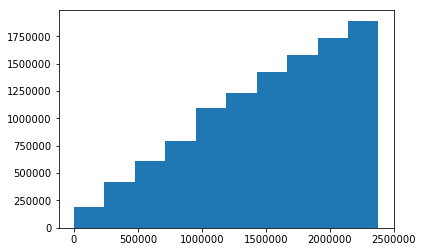

In [22]:
h = plt.hist(df.tsec,cumulative=True)

### График числа запросов в секунду

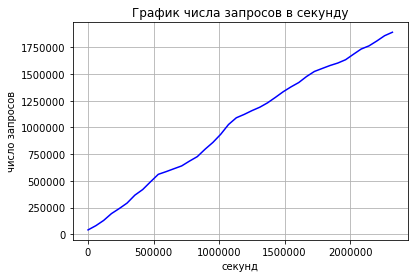

In [23]:
values, base = np.histogram(df.tsec, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel("секунд")
plt.ylabel("число запросов")
plt.title("График числа запросов в секунду")
plt.grid()
# plt.plot(base[:-1], len(df.tsec)-cumulative, c='green')
plt.show()

In [24]:
df.loc[df.bytes == "-"]

,host,timestamp,request,HTTP,bytes,tsec
50,dd15-062.compuserve.com,[01/Jul/1995:00:01:12 -0400],GET /news/sci.space.shuttle/archive/sci-space-...,404,-,71.0
116,dynip42.efn.org,[01/Jul/1995:00:02:14 -0400],GET /software HTTP/1.0,302,-,133.0
144,ix-or10-06.ix.netcom.com,[01/Jul/1995:00:02:40 -0400],GET /software/winvn HTTP/1.0,302,-,159.0
192,ix-or10-06.ix.netcom.com,[01/Jul/1995:00:03:24 -0400],GET /software HTTP/1.0,302,-,203.0
303,link097.txdirect.net,[01/Jul/1995:00:05:06 -0400],GET /shuttle HTTP/1.0,302,-,305.0
307,ix-war-mi1-20.ix.netcom.com,[01/Jul/1995:00:05:13 -0400],GET /shuttle/missions/sts-78/news HTTP/1.0,302,-,312.0
351,ix-war-mi1-20.ix.netcom.com,[01/Jul/1995:00:05:58 -0400],GET /shuttle/missions/sts-72/news HTTP/1.0,302,-,357.0
581,netport-27.iu.net,[01/Jul/1995:00:10:19 -0400],GET /pub/winvn/readme.txt HTTP/1.0,404,-,618.0
586,netport-27.iu.net,[01/Jul/1995:00:10:28 -0400],GET /pub/winvn/readme.txt HTTP/1.0,404,-,627.0
610,dynip38.efn.org,[01/Jul/1995:00:10:50 -0400],GET /software HTTP/1.0,302,-,649.0


In [25]:
df.loc[df.bytes == "-","bytes"] = 0
df[df.bytes == "-"]

,host,timestamp,request,HTTP,bytes,tsec


In [26]:
df["bytes"] = df["bytes"].map(int)

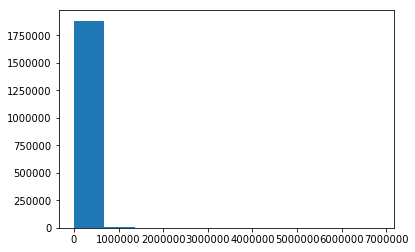

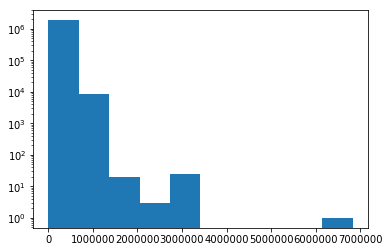

In [45]:
plt.hist(df.bytes)
plt.show()
plt.hist(df.bytes,log=True)
plt.show()

In [28]:
df.bytes.value_counts().index.max()

6823936

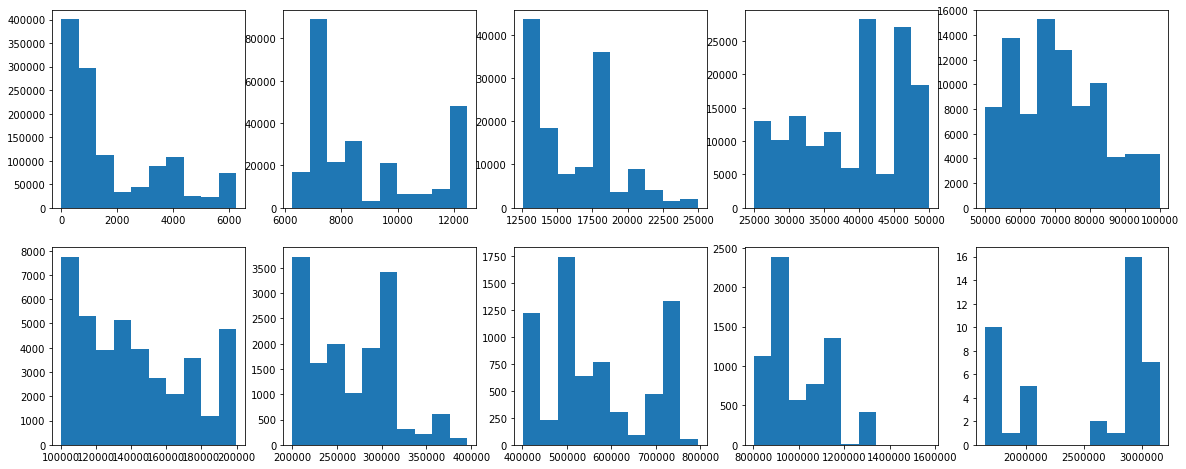

In [44]:
fig = plt.figure(figsize=(20,8))
eps0 = 6250
plt.subplot(2,5,1)
plt.hist(df.loc[(df.bytes<eps0)]["bytes"])
for i in range(9):
    eps = eps0*2**i
    plt.subplot(2,5,i+2)
    plt.hist(df.loc[(df.bytes>=eps) & (df.bytes<eps*2)]["bytes"])
plt.show()